# Dyskretyzacja 



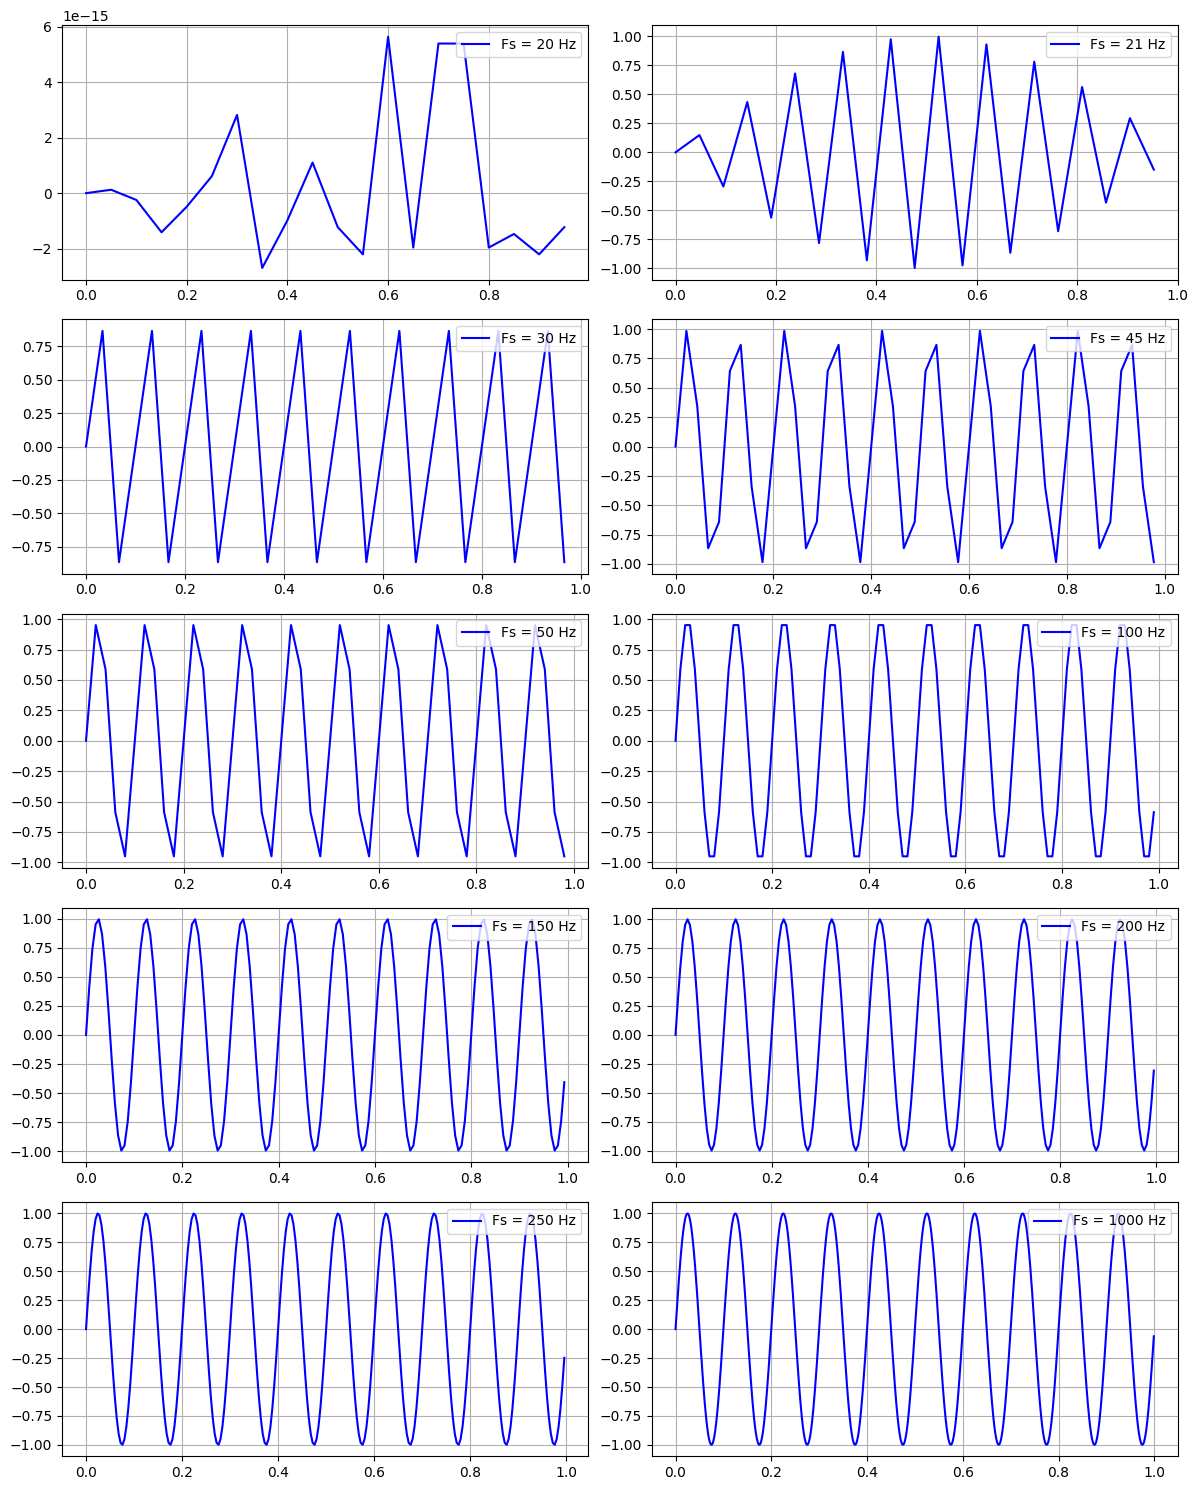

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gen_sinus(f, fs):
    dt = 1/fs
    t = np.arange(0,1,dt)
    s = np.sin(2*np.pi*f*t)
    return t, s

f = 10
fs_val = [20, 21, 30, 45, 50, 100, 150, 200, 250, 1000]

plt.figure(figsize=(12, 15))
for i, Fs in enumerate(fs_val, 1):
    t, s = gen_sinus(f, Fs)
    plt.subplot(5, 2, i)
    plt.plot(t, s, 'b-', label=f'Fs = {Fs} Hz')
    plt.legend(loc = 'upper right')
    plt.grid()

plt.tight_layout()
plt.show()


## Zadanie 4
### Twierdzenie Nyquista-Shannona 
## Zadanie 5
### Aliasing
![Aliasing](download.png)

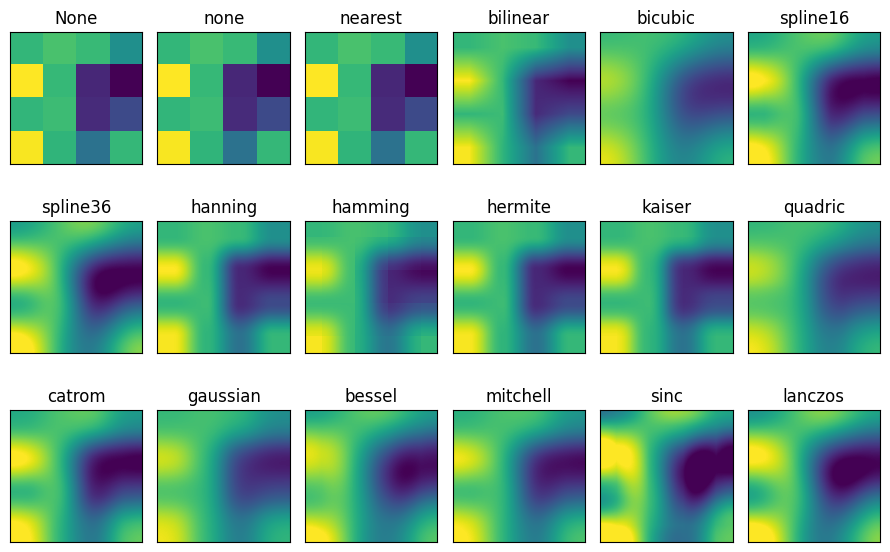

In [3]:
import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

# Kwantyzacja


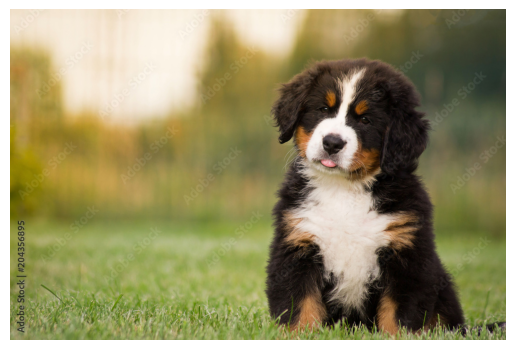

wymiary: 3
piksel: 3


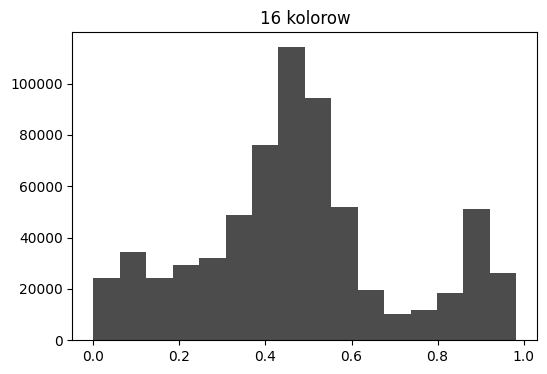

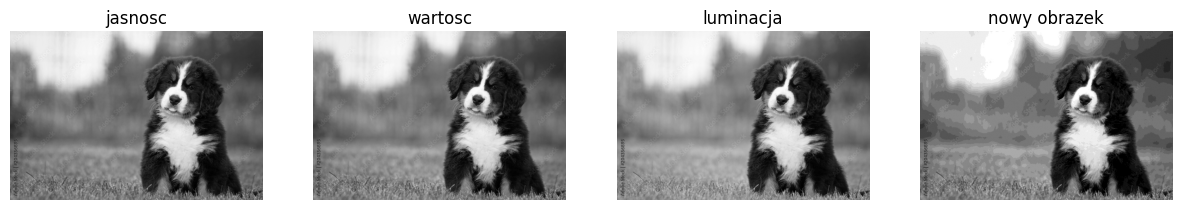

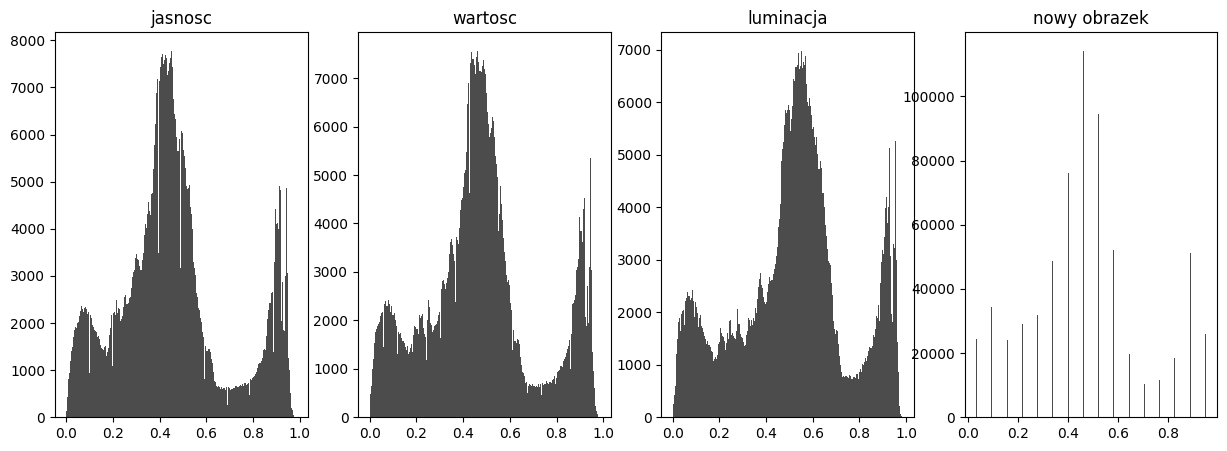

In [4]:
import matplotlib.image as mpimg

img = mpimg.imread('test3.png')
plt.imshow(img)
plt.axis('off')
plt.show()

print(f'wymiary: {img.ndim}')
print(f"piksel: {img.shape[2]}")


g1 = (np.max(img, axis = 2) + np.min(img, axis = 2)) / 2 #jasnosc
g2 = np.mean(img, axis = 2) #wartosc
g3 = 0.21 * img[:, :, 0] + 0.72 * img[:, :, 1] + 0.07 * img[:, :, 2] #luminacja


fig, ax = plt.subplots(figsize=(6, 4))
n, bins, patches = ax.hist(g2.ravel(), bins=16, color='black', alpha=0.7,label="16 kolorow")
ax.set_title('16 kolorow')


bin_centers = (bins[:-1] + bins[1:]) / 2

new = np.digitize(g2, bins[:-1]) - 1
new = np.clip(new, 0, len(bin_centers) - 1)
new = bin_centers[new]

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(g1,cmap="gray")
ax[0].axis("off")
ax[0].set_title('jasnosc')

ax[1].imshow(g2,cmap="gray")
ax[1].axis("off")
ax[1].set_title('wartosc')

ax[2].imshow(g3,cmap="gray")
ax[2].axis("off")
ax[2].set_title('luminacja')

ax[3].imshow(new,cmap="gray")
ax[3].axis("off")
ax[3].set_title('nowy obrazek')

plt.show()

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].hist(g1.ravel(), bins=256, color='black', alpha=0.7)
ax[0].set_title('jasnosc')

ax[1].hist(g2.ravel(), bins=256, color='black', alpha=0.7)
ax[1].set_title('wartosc')

ax[2].hist(g3.ravel(), bins=256, color='black', alpha=0.7)
ax[2].set_title('luminacja')

ax[3].hist(new.ravel(), bins=256, color='black', alpha=0.7)
ax[3].set_title('nowy obrazek')


plt.show()



# Binaryzacja

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7820\1343871605.py:77: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  prop = ndimage.measurements.sum(grey,obiekty, range(num_obiekty + 1))


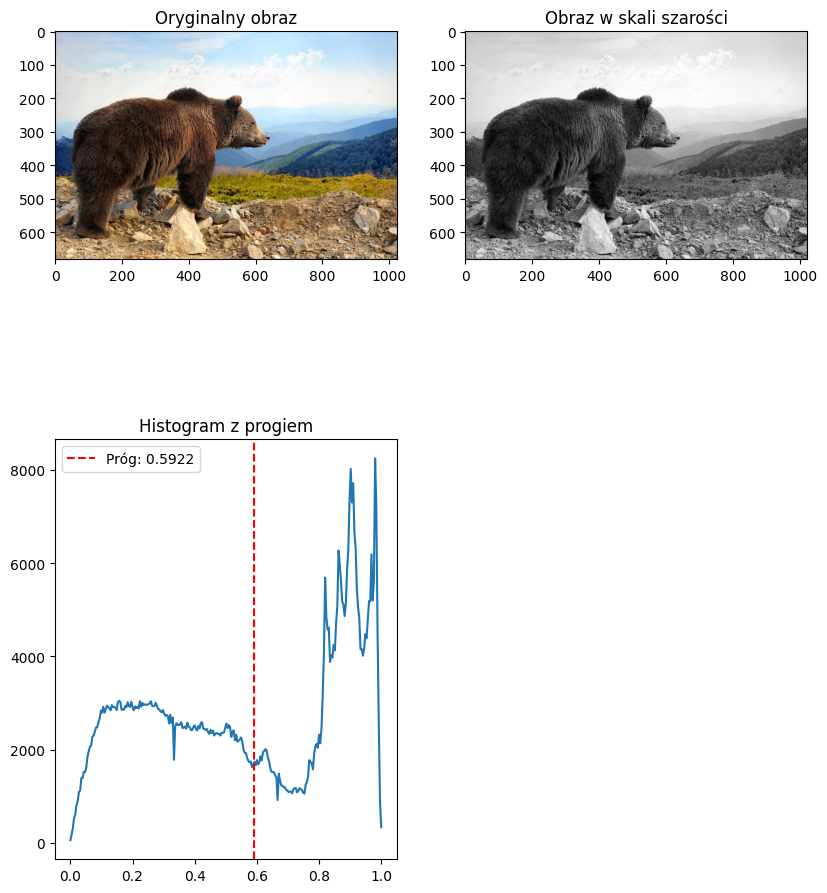

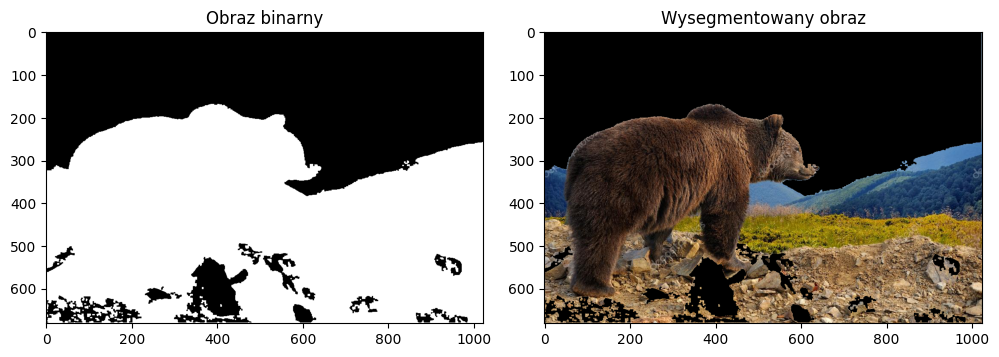

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

def konNaSzarosc(img):
    obraz = plt.imread(img)
    if len(obraz.shape) == 3 and obraz.shape[2] >= 3:
        grey = np.mean(obraz, axis=2)
        if grey.max() > 1.0:
            grey = grey / 255.0
    else:
        grey = obraz
        if grey.max() > 1.0:
            grey = grey / np.max(grey)
    return grey, obraz

def genHist(grey):
    hist, bins = np.histogram(grey.flatten(), bins=256, range=(0, 1))
    return hist, bins

def znajdzProg(hist):
    smooth = ndimage.gaussian_filter1d(hist, sigma=3)

    localMin = []
    for i in range(1,len(smooth) - 1):
        if smooth[i-1] > smooth[i]< smooth[i+1]:
            localMin.append((i, smooth[i]))

    if not localMin:
        return 0.5
    
    minimum = None
    glebokosc = 0
    
    for i, wartosc in localMin:
        lewy_max = max(smooth[:i])if i > 0 else 0
        prawy_max = max(smooth[i:]) if i< len(smooth) - 1 else 0

        glebokosc_doliny = min(lewy_max -wartosc, prawy_max - wartosc)

        if glebokosc_doliny > glebokosc:
            glebokosc = glebokosc_doliny
            minimum = i
    
    if minimum is not None:
        return minimum / 255
    else:
        return 0.5

def binImg(grey, prog):
    obrazBin = np.zeros_like(grey)
    obrazBin[grey > prog] = 1
    return obrazBin

def mask(obraz, maskaBin):

    single = np.zeros_like(obraz) 
    

    if len(obraz.shape) == 3:  
        for i in range(3):  
            single[:, :, i] = obraz[:,:, i] *maskaBin
    else:  
        single = obraz * maskaBin
    
    return single

def shiftMask(maskaBin):
    return 1 - maskaBin  

def delSmallObj(grey, min_rozmiar=500):
    struktura = np.ones((3, 3))  
    grey = ndimage.binary_opening(grey,structure=struktura)
    grey = ndimage.binary_closing(grey, structure=struktura)
    
    obiekty, num_obiekty = ndimage.label(grey)
    prop = ndimage.measurements.sum(grey,obiekty, range(num_obiekty + 1))
    for i in range(1, num_obiekty + 1):
        if prop[i] < min_rozmiar:
            grey[obiekty == i] = 0
    
    return grey


img = 'bear.png'
grey, orginal = konNaSzarosc(img)

hist, bins = genHist(grey)
prog = znajdzProg(hist) #0.59
Bin = binImg(grey, prog)
Bin = delSmallObj(Bin)
maska = shiftMask(Bin)
wysegmentowany = mask(orginal, maska)

plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
plt.title("Oryginalny obraz")
plt.imshow(orginal)

plt.subplot(2, 3, 2)
plt.title("Obraz w skali szarości")
plt.imshow(grey, cmap='gray')

plt.subplot(2, 3, 4)
plt.title("Histogram z progiem")
plt.plot(np.linspace(0, 1, 256), hist)
plt.axvline(x=prog, color='r', linestyle='--', label=f'Próg: {prog:.4f}')
plt.legend()

plt.figure(figsize=(15, 12))
plt.subplot(1, 3, 1)
plt.title("Obraz binarny")
plt.imshow(Bin, cmap='binary')

plt.subplot(1, 3, 2)
plt.title("Wysegmentowany obraz")
plt.imshow(wysegmentowany)

plt.tight_layout()
plt.show()
